In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import Imputer 
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('planets.csv', skiprows = 358)  #skips first 358 rows, these are garbage rows      

In [5]:
       
unique = df.pl_discmethod.unique() #get unique values from the column pl_discmethod
"pl_discmethod contains info about how the planet was discovered, using waht technique"
dataFrameDict = {elem : 'hehe' for elem in unique } 

for key in dataFrameDict.keys():
    dataFrameDict[key] = df[:][df.pl_discmethod == key] #splits dataframe row wise based on disc method 

dataTransit = dataFrameDict['Transit']      #Transit is one method of finding exoplanets 
dataTransit.reset_index(drop =True, inplace = True)

In [6]:
cols2exclude = [0,1,2,3,25,38,40,49,65,66,136,153,154,155,156,157,158,159,164,165,166,167,168,209,228,246] #labeled data
"cols2exclude contains column index which are string type and contains some general info"

dt_y = dataTransit.iloc[:, cols2exclude] 
dt_X = dataTransit.iloc[:, ~dataTransit.columns.isin(dataTransit.columns[cols2exclude])] 
dt_X.reset_index(drop = True, inplace = True)
dt_X.dropna(axis =1 , how = "all", inplace = True)
dt_X = dt_X.drop(['pl_pnum'], axis =1 )  #dropping this column, didnt find any useful meaning as of now. 
#dt_X = dt_X.sort_values('pl_orbper')
"dt_X dataframe, all float dtype, ready for feature scaling"

C:\Users\Atharv\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


'dt_X dataframe, all float dtype, ready for feature scaling'

In [7]:
values = dt_X.values  
imputer = Imputer()
transformed_values = imputer.fit_transform(values)      #fills nan values with mean of the column values 
dt_std = StandardScaler().fit_transform(transformed_values)      #standard feature scalling 
dt_std_df = pd.DataFrame(dt_std, columns = dt_X.columns ) 

In [8]:
# def findIQR(columnName):
#     Q1 = dt_X[columnName].quantile(0.25)
#     Q3 = dt_X[columnName].quantile(0.75)
#     return Q3 - Q1

# def calculateBin(columnName):
#     """
#     The interquartile range [IQR] is the range of the middle 50% of the values
#     in a data set, which is calculated as the difference between the 75th 
#     [upper quartile Q3] and 25th percentile [lower quartile Q1] values.1
#     """
#     IQR = findIQR(columnName)      #calculating the interquartile range
#     n = 2804 - dt_X[columnName].isnull().sum()      #check it n should be inclusive of nan values or not
#     h = 2 * (IQR) * n**(-(1/3) )
#     return (dt_X[columnName].max() - dt_X[columnName].min()) / h 

# calculateBin('pl_orbper')

In [9]:
font = {'family' : 'serif',
        'serif' : 'Times New Roman'}
plt.rc('font', **font)
#matplotlib.rcdefaults()

rad_pl = [4879,12104,12756,6792,142984,120536,51118,49528]
for i in range(0,8):
    rad_pl[i] = rad_pl[i]/142984
orb_per = [88,224.7,365.2,687,4331,10747,30589,59800]
temp_sun = []
for i in range(0,8):
    temp_sun.append(6000)
semi_mj = [0.3871,0.7233,1.000,1.5273,5.2028,9.5388,19.1914,30.0611]
planets = ['Mercury','Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune']
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
mass_pl = [0.330,4.87,5.97,0.642,1898,568,86.8,102]
for i in range(0,8):
    mass_pl[i] = mass_pl[i]/1898
dens = [5.4,5.2,5.5,3.9,1.3,0.7,1.3,1.6]

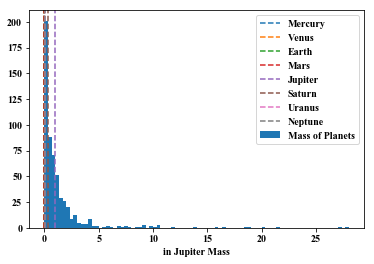

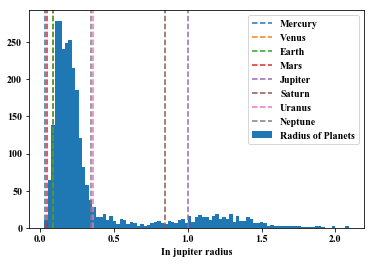

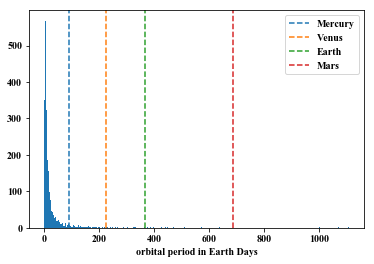

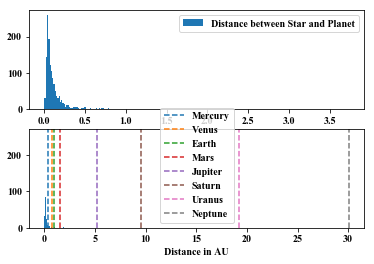

In [10]:
plt.hist(dt_X['pl_bmassj'].dropna(), bins = 'auto', label = 'Mass of Planets') 
for i in range(0,8):
    plt.axvline(mass_pl[i], color = colors[i], linestyle = 'dashed', label = planets[i])
plt.xlabel('in Jupiter Mass')
plt.legend()
plt.show()

plt.hist(dt_X['pl_radj'].dropna(), bins = 'auto',label = 'Radius of Planets')
for i in range(0,8):
    plt.axvline(rad_pl[i], color = colors[i], linestyle = 'dashed', label = planets[i])
plt.xlabel('In jupiter radius')
plt.legend()
plt.show()      
      
plt.hist(dt_X[dt_X['pl_orbper'] < 1200]['pl_orbper'].dropna(), bins = 'auto')
for i in range(0,4):
    plt.axvline(orb_per[i], color = colors[i], linestyle = 'dashed', label = planets[i])
plt.xlabel('orbital period in Earth Days')
plt.legend()
plt.show()

plt.subplot(211)
plt.hist(dt_X['pl_orbsmax'].dropna(), bins = 236, label = 'Distance between Star and Planet'  )
plt.xlabel('Distance in AU')
plt.legend()
plt.subplot(212)
plt.hist(dt_X['pl_orbsmax'].dropna(), bins = 236)
for i in range(0,8):
    plt.axvline(semi_mj[i],color = colors[i], linestyle = 'dashed', label = planets[i])
plt.xlabel('Distance in AU')
plt.legend()
plt.show()

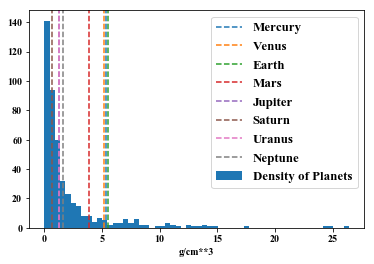

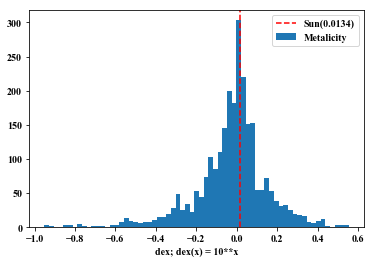

In [12]:
fig , ax = plt.subplots()
ax.hist(dt_X[dt_X['pl_dens'] < 70]['pl_dens'].dropna(), bins = 'auto', label = 'Density of Planets')
#ax.hist(dt_X['pl_dens'].dropna(),bins = 'auto')
for i in range(0,8):
    ax.axvline(dens[i],color = colors[i],linestyle = 'dashed', label = planets[i])
ax.set_xlabel('g/cm**3')
ax.legend(loc = 'upper right', prop = {'size' : 13})
plt.show()

fig, ax = plt.subplots()
ax.hist(dt_X['st_metfe'].dropna(), bins = 65, label = 'Metalicity')
ax.axvline(0.0134, color = 'red',linestyle = 'dashed', label = 'Sun(0.0134)')
#locs, labels = plt.xticks()
#locs = list(locs)
#labels+=[0.0134]
#locs.append(0.0134)
#locs.sort()
#ax.xaxis.set_ticks(locs)
ax.set_xlabel('dex; dex(x) = 10**x')
ax.legend(loc = 'upper right', prop = {'size':10})
plt.show()

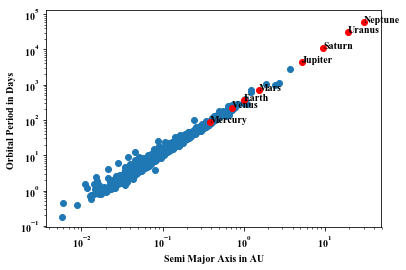

ValueError: Image size of 718927702x27185 pixels is too large. It must be less than 2^16 in each direction.

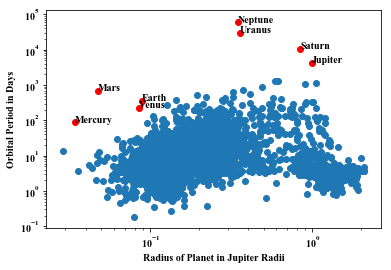

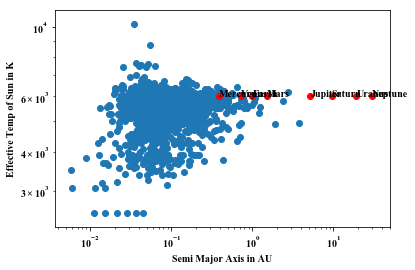

In [14]:
fig = plt.figure()
ax = plt.gca()  
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Semi Major Axis in AU')
ax.set_ylabel('Orbital Period in Days ')
ax.scatter(dt_X['pl_orbsmax'], dt_X['pl_orbper'])
ax.scatter(semi_mj,orb_per,c='red')
for i in range(0,8):
    ax.annotate(planets[i], xy  = [semi_mj[i],orb_per[i]])
#fig.savefig('semi vs orbital.png')
plt.show()

fig = plt.figure()
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Orbital Period in Days, Squared')
ax.set_ylabel('Semi Major Axis, Cubed')
ax.scatter(dt_X['pl_orbper']**2, dt_X['pl_orbsmax']**3)
ax.scatter(np.power(orb_per,2),np.power(semi_mj,3),c = 'red')
for i in range(0,8):
    ax.annotate(planets[i], xy  = [np.power(orb_per[i],2),np.power(semi_mj[i],3)],
                xytext = [np.power(orb_per[i],2),np.power(semi_mj[i],3)])
#fig.savefig('orbital2 vs semi3.png')
plt.show()

fig = plt.figure()
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Radius of Planet in Jupiter Radii')
ax.set_ylabel('Orbital Period in Days')
ax.scatter(dt_X['pl_radj'], dt_X['pl_orbper'])
ax.scatter(rad_pl,orb_per,c = 'red')
for i in range(0,8):
    ax.annotate(planets[i], xy  = [rad_pl[i],orb_per[i]])
#fig.savefig('radius of planet vs orbital period.png')
plt.show()

fig = plt.figure()
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Semi Major Axis in AU')
ax.set_ylabel('Effective Temp of Sun in K')
ax.scatter(dt_X['pl_orbsmax'], dt_X['st_teff'])
ax.scatter(semi_mj, temp_sun, c = 'red')
for i in range(0,8):
    ax.annotate(planets[i], xy  = [semi_mj[i],temp_sun[i]])

#fig.savefig('semimajor vs eff temp.png')
plt.show()

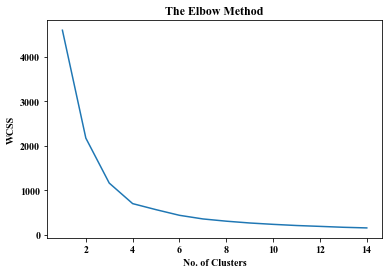

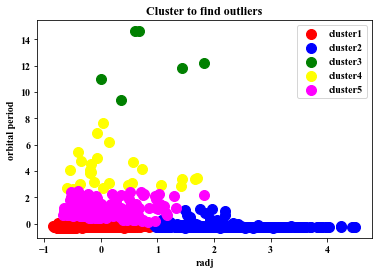

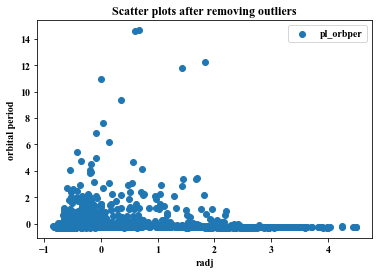

In [16]:
#KNN between radius and orbital period of planet
X = dt_std_df[['pl_radj','pl_orbper']].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300, n_init = 10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()
    
kmeans = KMeans(n_clusters=5, init = 'k-means++', max_iter = 300, n_init =10, random_state =0)
y_means = kmeans.fit_predict(X)

plt.scatter(X[y_means == 0, 0], X[y_means ==0, 1], s =100, c ='red', label = 'cluster1')
plt.scatter(X[y_means == 1, 0], X[y_means ==1, 1], s =100, c ='blue', label = 'cluster2')
plt.scatter(X[y_means == 2, 0], X[y_means ==2, 1], s =100, c ='green', label = 'cluster3')
plt.scatter(X[y_means == 3, 0], X[y_means ==3, 1], s =100, c ='yellow', label = 'cluster4')
plt.scatter(X[y_means == 4, 0], X[y_means ==4, 1], s =100, c ='magenta', label = 'cluster5')

plt.title('Cluster to find outliers')
plt.xlabel('Radius in Jupiter Radius') 
plt.ylabel('orbital period in Days ')
plt.legend()
plt.show()

np.flatnonzero(y_means == 4)
dt_std_df.drop(2748, inplace = True)
dt_std_df.reset_index(drop =True, inplace = True)
plt.scatter(dt_std_df['pl_radj'], dt_std_df['pl_orbper']) 
plt.title('Scatter plots after removing outliers')
plt.xlabel('Radius in Jupiter Radius') 
plt.ylabel('orbital period in Days ')
plt.legend()
plt.show()

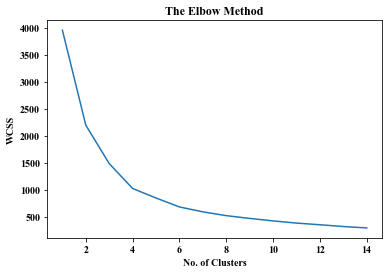

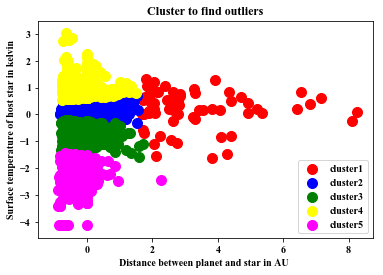

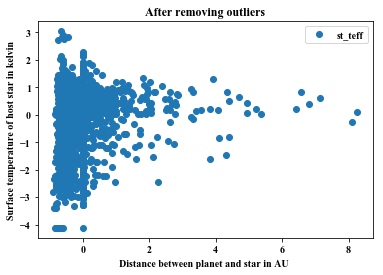

In [20]:
#KNN between orbital distance(Semi Major Axis) and effective temperature of Star
X = dt_std_df[['pl_orbsmax','st_teff']].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300, n_init = 10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()
    
kmeans = KMeans(n_clusters=5, init = 'k-means++', max_iter = 300, n_init =10, random_state =0)
y_means = kmeans.fit_predict(X)

plt.scatter(X[y_means == 0, 0], X[y_means ==0, 1], s =100, c ='red', label = 'cluster1')
plt.scatter(X[y_means == 1, 0], X[y_means ==1, 1], s =100, c ='blue', label = 'cluster2')
plt.scatter(X[y_means == 2, 0], X[y_means ==2, 1], s =100, c ='green', label = 'cluster3')
plt.scatter(X[y_means == 3, 0], X[y_means ==3, 1], s =100, c ='yellow', label = 'cluster4')
plt.scatter(X[y_means == 4, 0], X[y_means ==4, 1], s =100, c ='magenta', label = 'cluster5')
#plt.scatter(X[y_means == 5, 0], X[y_means ==5, 1], s =100, c ='cyan', label = 'cluster6')
#plt.scatter(X[y_means == 6, 0], X[y_means ==6, 1], s =100, c ='purple', label = 'cluster7')
plt.title('Cluster to find outliers')
plt.xlabel('Distance between planet and star in AU ') 
plt.ylabel('Surface temperature of host star in kelvin')
plt.legend()
plt.show()

# Eliminating the Outliers
np.flatnonzero(y_means == 3)
dt_std_df.drop([1207,1221,2049], inplace = True)
#plt.scatter(dt_std_df['pl_orbsmax'], dt_std_df['st_teff'])  
np.where(X[:,1] >4)
dt_std_df.drop([324,331,519], inplace = True)   
dt_std_df.reset_index(drop =True, inplace = True)  
plt.scatter(dt_std_df['pl_orbsmax'], dt_std_df['st_teff'])   
plt.title('After removing outliers')
plt.xlabel('Distance between planet and star in AU ') 
plt.ylabel('Surface temperature of host star in kelvin')
plt.legend()
plt.show()


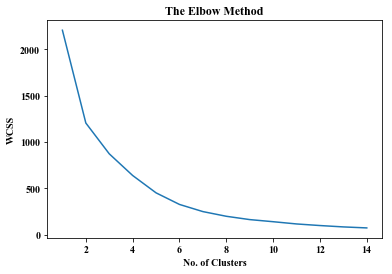

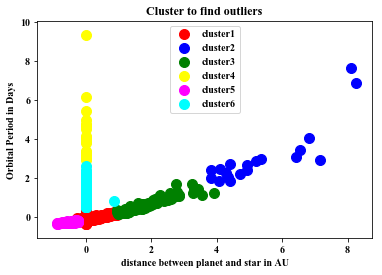

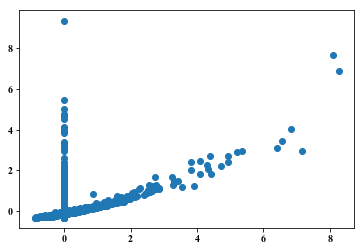

In [21]:
#plt.scatter( dr['pl_orbper'], dr['pl_bmassj'], color = 'blue') 
#KNN between Semi Major Axis and orbital period 
X = dt_std_df[['pl_orbsmax','pl_orbper']].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300, n_init = 10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()
    
kmeans = KMeans(n_clusters=6, init = 'k-means++', max_iter = 300, n_init =10, random_state =0)
y_means = kmeans.fit_predict(X)

plt.scatter(X[y_means == 0, 0], X[y_means ==0, 1], s =100, c ='red', label = 'cluster1')
plt.scatter(X[y_means == 1, 0], X[y_means ==1, 1], s =100, c ='blue', label = 'cluster2')
plt.scatter(X[y_means == 2, 0], X[y_means ==2, 1], s =100, c ='green', label = 'cluster3')
plt.scatter(X[y_means == 3, 0], X[y_means ==3, 1], s =100, c ='yellow', label = 'cluster4')
plt.scatter(X[y_means == 4, 0], X[y_means ==4, 1], s =100, c ='magenta', label = 'cluster5')
plt.scatter(X[y_means == 5, 0], X[y_means ==5, 1], s =100, c ='cyan', label = 'cluster6')
#plt.scatter(X[y_means == 6, 0], X[y_means ==6, 1], s =100, c ='purple', label = 'cluster7')
plt.title('Cluster to find outliers')
plt.xlabel('distance between planet and star in AU') 
plt.ylabel('Orbital Period in Days')
plt.legend()
plt.show()

np.where(X[:,1]> 8)
dt_std_df.drop([330,331,333], inplace = True)   
plt.scatter(dt_std_df['pl_orbsmax'], dt_std_df['pl_orbper'])

In [ ]:
"""
Was checking if nan values affect histogram plots, it doesn't.
list = []
for x in dt_X['pl_orbper'] :
    if pd.notna(x) == True:
        list.append(x)
plt.hist(list, bins = 1114)
"""

In [ ]:
#PCA 
# Selecting some important features from the dataset 
column = ['pl_orbper','pl_orbsmax','pl_orbeccen','pl_orbincl',
          'pl_bmassj','pl_radj','pl_dens','st_dist', 'st_optmag',
          'st_teff','st_mass', 'st_rad']
pca_df = dt_std_df.loc[:, column]
pca = sklearnPCA(n_components=8) 
pca.fit(pca_df)
X = pca.transform(pca_df) 
transformed = pd.DataFrame(X)
pca.explained_variance_ratio_  #the contribution to variance is too low for each principal component
#test_arr = pca.components_    #the 'final' df has original columns mapped with principal components
       
    
# The graph helps select no of components that contribute to maximum variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()
plt.show()

plt.scatter( transformed[0], transformed[1], color = 'red')
plt.xlabel('Principal Component 1 ')
plt.ylabel('Principal Component 2');
plt.grid()
plt.show()
plt.scatter( transformed[1], transformed[2], color = 'blue')
plt.xlabel('Principal Component 2 ')
plt.ylabel('Principal Component 3');
plt.grid()
plt.show()

In [ ]:
col = ['st_mass', 'st_teff', 'st_rad', 'st_metfe']
pca_star = dt_std_df.loc[:, col]
pca = sklearnPCA(n_components=4) 
pca.fit(pca_star)
X = pca.transform(pca_star) 
transformed = pd.DataFrame(X, columns = ['a','b','c','d'])
pca.explained_variance_ratio_ 

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()
plt.show() 

plt.scatter(transformed['a'], transformed['b']) 
plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2')
plt.legend()
plt.show() 


X_arr = transformed[['a','b']].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300, n_init = 10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()
    
kmeans = KMeans(n_clusters=5, init = 'k-means++', max_iter = 300, n_init =10, random_state =0)
y_means = kmeans.fit_predict(X)

plt.scatter(X[y_means == 0, 0], X[y_means ==0, 1], s =100, c ='red', label = 'cluster1')
plt.scatter(X[y_means == 1, 0], X[y_means ==1, 1], s =100, c ='blue', label = 'cluster2')
plt.scatter(X[y_means == 2, 0], X[y_means ==2, 1], s =100, c ='green', label = 'cluster3')
plt.scatter(X[y_means == 3, 0], X[y_means ==3, 1], s =100, c ='yellow', label = 'cluster4')
plt.scatter(X[y_means == 4, 0], X[y_means ==4, 1], s =100, c ='magenta', label = 'cluster5')
#plt.scatter(X[y_means == 5, 0], X[y_means ==5, 1], s =100, c ='cyan', label = 'cluster6')
#plt.scatter(X[y_means == 6, 0], X[y_means ==6, 1], s =100, c ='purple', label = 'cluster7')
plt.title('Cluster to find outliers')
plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2')
plt.legend()
plt.show() 

In [ ]:
#a = dt_X.dtypes == object
#dt_X.pl_orblperlim
#dt = dt.drop(['pl_discmethod'], axis = 1 )  drops the mentioned column from the dataset 
#dataRadVel = dataFrameDict['Radial Velocity']
#dr = dataRadVel.sort_values('pl_orbper') 



#dt3 = dt[dt['pl_bmassj'] < 5 ]
#dt_norm = (transformed_values - transformed_values.mean())/(transformed_values.max() - transformed_values.min()) 
#dt2 = dt_norm[dt_norm['pl_orbper']  < .4] 

#plt.scatter( dr['pl_orbper'], dr['pl_bmassj'], color = 'blue') 

#plt.scatter( dt3['pl_bmassj'], dt3['pl_radj'], color = 'cyan') 
 
#dt_X['pl_ratdor'].isnull().sum()

""" TO DO: 
    Apply PCA on dataset made out of important features. 
    Find a way to eliminate uncertainty variables for each feature
    document: why pca requires normalized data, write about wcss,
    apply pca on star properties, find out which property dominates more. 
    find clustering between them 
    
    
"""
""" Random Thoughts:
    planet astronomical flag can help split the dataset  
"""

""" Done New Today:

12/02
studied the data, understood meanings of column names, failed attempts at normalizing the data
split data based on methodology used to identify them
13/02
understanding PCA and trying to apply onto the dataset, failed
14/02
new approach plot m vs r and m vs orbit days, for transit and radial velocity methods, failed to eliminate outliers,
found and elimated outliers based on hit and trail method  
15/02
split data based on values and labels, will help in normalizing data, and appying outlier identification methods on the dataset
21/02
applied feature scaling and pca on the dataframe (much of the substantial work)
26/02
found out how components can map on to corresponding columns
10/03
Worked on PCA and got the basics cleared and found ways to find outliers (z score), 
learnt about finding correlation between columns containing uncertainties
11/03
Found some more solutions(IQR), learnt about bins in historgram and combining 
IQR to find optimal bin value, Plotted all the necessary histrograms
12/03
plotted scatter plots, found out lot of outliers exist, realized can't just take
one parameter into consideration to remove outlier. 
13/03
Revised KNN to implement and find outliers
18/03
implemented KNN, removed outliers based on some important features. 
20/03 - 22/03 & 26/03-28/3 
Learnt more about plotting graphs, changed the scale of graphs, added planet lines.  
"""